# Generative Adversarial Networks

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Set the parameters of GANs

In [2]:
batch_size = 256

z_size = 100
g_w1_size = 256
g_w2_size = 784

x_size = 784
d_w1_size = 128
d_w2_size = 1

In [3]:
x = tf.placeholder(tf.float32, shape = [None, x_size])
z = tf.placeholder(tf.float32, shape = [None, z_size])

weights_d = {
    'w1': tf.Variable(tf.truncated_normal([x_size, d_w1_size], stddev = 0.1)),
    'b1': tf.Variable(tf.constant(0.1, shape=[d_w1_size])),
    'w2': tf.Variable(tf.truncated_normal([d_w1_size, d_w2_size], stddev = 0.1)),
    'b2': tf.Variable(tf.constant(0.1, shape=[d_w2_size])),
}

weights_g = {
    'w1': tf.Variable(tf.truncated_normal([z_size, g_w1_size], stddev = 0.1)),
    'b1': tf.Variable(tf.constant(0.1, shape=[g_w1_size])),
    'w2': tf.Variable(tf.truncated_normal([g_w1_size, g_w2_size], stddev = 0.1)),
    'b2': tf.Variable(tf.constant(0.1, shape=[g_w2_size])),
}

## Build generator and discriminator networks

In [4]:
def generator(z):
    h1 = tf.nn.relu(tf.add(tf.matmul(z, weights_g["w1"]), weights_g["b1"]))
    h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, weights_g["w2"]), weights_g["b2"]))
    return h2


def discriminator(x):
    h1 = tf.nn.relu(tf.add(tf.matmul(x, weights_d["w1"]), weights_d["b1"]))
    h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, weights_d["w2"]), weights_d["b2"]))
    return h2

## Build cost functions and optimizers

In [5]:
def generate_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

sample = generator(z)
d_real = discriminator(x)
d_fake = discriminator(sample)

d_loss = -tf.reduce_mean(tf.log(d_real) + tf.log(1. - d_fake))
g_loss = -tf.reduce_mean(tf.log(d_fake))

In [6]:
# Only update discriminator's parameters
d_optimizer = tf.train.AdamOptimizer(0.0005).minimize(d_loss, var_list = weights_d.values())
# Only update generator's parameters
g_optimizer = tf.train.AdamOptimizer(0.0001).minimize(g_loss, var_list = weights_g.values())

## Build a plot function

In [7]:
def plot(samples):
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap = 'gray')

    plt.show()

## Train GANs

Every 10000 iterations, plot the output of the generator

step 1000, discriminator loss 0.01003, generator loss 5.68309
step 2000, discriminator loss 0.04867, generator loss 5.06549
step 3000, discriminator loss 0.00944, generator loss 6.85160
step 4000, discriminator loss 0.03057, generator loss 6.46304
step 5000, discriminator loss 0.03857, generator loss 6.71351
step 6000, discriminator loss 0.02817, generator loss 6.84060
step 7000, discriminator loss 0.04204, generator loss 6.73832
step 8000, discriminator loss 0.07752, generator loss 6.92571
step 9000, discriminator loss 0.09998, generator loss 5.57583
step 10000, discriminator loss 0.08682, generator loss 5.79539


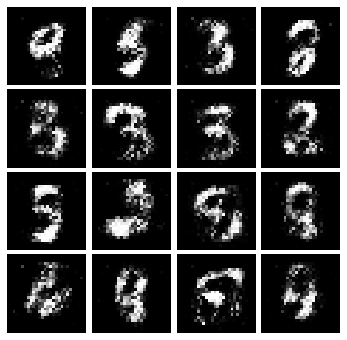

step 11000, discriminator loss 0.09363, generator loss 6.77688
step 12000, discriminator loss 0.13939, generator loss 6.11638
step 13000, discriminator loss 0.16181, generator loss 4.56520
step 14000, discriminator loss 0.15898, generator loss 5.87029
step 15000, discriminator loss 0.14778, generator loss 5.34413
step 16000, discriminator loss 0.20094, generator loss 5.01340
step 17000, discriminator loss 0.30784, generator loss 4.27339
step 18000, discriminator loss 0.18830, generator loss 5.51175
step 19000, discriminator loss 0.22227, generator loss 5.17017
step 20000, discriminator loss 0.21731, generator loss 4.09881


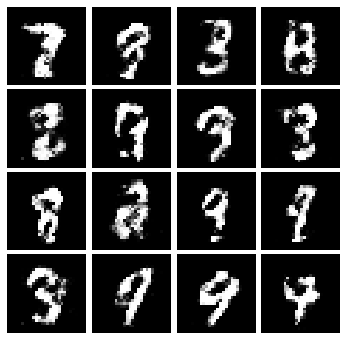

step 21000, discriminator loss 0.23820, generator loss 5.01673
step 22000, discriminator loss 0.23595, generator loss 4.72897
step 23000, discriminator loss 0.17525, generator loss 5.43022
step 24000, discriminator loss 0.33082, generator loss 4.09512
step 25000, discriminator loss 0.20485, generator loss 5.00960
step 26000, discriminator loss 0.21478, generator loss 4.62333
step 27000, discriminator loss 0.23784, generator loss 4.57089
step 28000, discriminator loss 0.20336, generator loss 4.71069
step 29000, discriminator loss 0.22460, generator loss 4.36046
step 30000, discriminator loss 0.27058, generator loss 4.20042


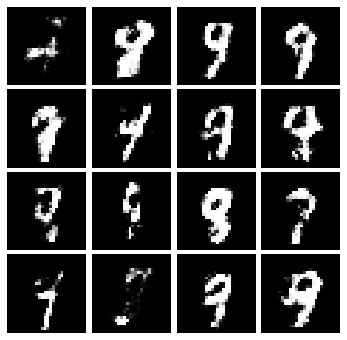

step 31000, discriminator loss 0.29641, generator loss 4.81337
step 32000, discriminator loss 0.21857, generator loss 4.41682
step 33000, discriminator loss 0.16135, generator loss 4.54801
step 34000, discriminator loss 0.29784, generator loss 4.13829
step 35000, discriminator loss 0.19040, generator loss 4.41050
step 36000, discriminator loss 0.20340, generator loss 3.81999
step 37000, discriminator loss 0.21182, generator loss 4.46103
step 38000, discriminator loss 0.20894, generator loss 4.89393
step 39000, discriminator loss 0.20805, generator loss 4.27409
step 40000, discriminator loss 0.18485, generator loss 4.19649


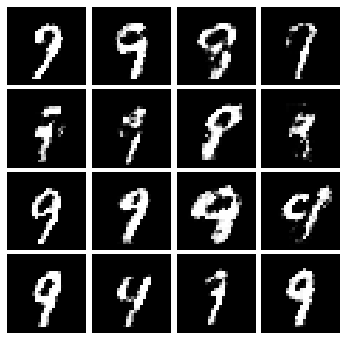

In [8]:
sess = tf.InteractiveSession()
init_op = tf.global_variables_initializer()
sess.run(init_op)

epochs = 40000
d_loss_train, g_loss_train = np.zeros(epochs), np.zeros(epochs)
for step in range(1, epochs + 1):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train[step - 1] = sess.run([d_optimizer, d_loss], feed_dict = {x: batch_x, z: generate_z(batch_size, z_size)})
    _, g_loss_train[step - 1] = sess.run([g_optimizer, g_loss], feed_dict = {z: generate_z(batch_size, z_size)})
    
    if step % 1000 == 0:
        print("step %d, discriminator loss %.5f," % (step, d_loss_train[step - 1]), end = " "),
        print("generator loss %.5f" % (g_loss_train[step - 1]))
    
    if step % 10000 == 0:
        g_sample_plot = sess.run(sample, feed_dict = {z: generate_z(16, z_size)})
        plot(g_sample_plot)

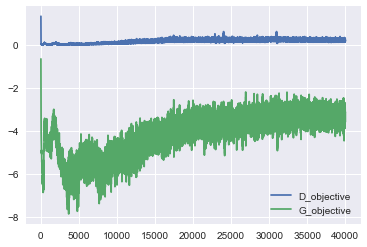

In [9]:
plt.plot(range(epochs), d_loss_train, label = 'D_objective')
plt.plot(range(epochs), 1 - g_loss_train, label = 'G_objective')
plt.legend()